In [2]:
import requests
from bs4 import BeautifulSoup

# URL of the page to scrape
url = "https://www.flipkart.com/poco-m6-pro-5g-power-black-128-gb/p/itmef8fa46f89738?pid=MOBGRNZ3ER4N3K4F&lid=LSTMOBGRNZ3ER4N3K4FIYYGCU&marketplace=FLIPKART&q=mobile&store=tyy%2F4io&spotlightTagId=BestsellerId_tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=Search&iID=4309954e-3354-4d23-818e-bbcd16b09798.MOBGRNZ3ER4N3K4F.SEARCH&ppt=sp&ppn=sp&ssid=pi59dlbm680000001722086699443&qH=532c28d5412dd75b"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract the model name
    model_name = soup.find('div', class_='KzDlHZ').text
    
    # Extract the price
    price = soup.find('div', class_='Nx9bqj _4b5DiR').text

    print(f"Model Name: {model_name}")
    print(f"Price: {price}")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


Failed to retrieve the page. Status code: 500


In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time

# Initialize the Chrome driver
driver = webdriver.Chrome()

# Open the Flipkart website
driver.get('https://www.flipkart.com')

# Close the login popup
try:
    close_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//button[contains(text(), "✕")]'))
    )
    close_button.click()
except:
    pass

# Search for the product
search_box = driver.find_element(By.NAME, 'q')
product_name = input("Enter the product name to search: ")
search_box.send_keys(product_name)
search_box.send_keys(Keys.RETURN)

# Wait for the search results to load
WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CLASS_NAME, 'cPHDOP col-12-12'))
)

# Scroll down to load more products
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)  # Wait for the new products to load

# Parse the page content
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Extract product details
products = soup.find_all('div', class_='cPHDOP col-12-12')
data = []

for product in products:
    try:
        model_name = product.find('div', class_='KzDlHZ').text
        price = product.find('div', class_='Nx9bqj _4b5DiR').text
        data.append([model_name, price])
    except AttributeError:
        continue

# Close the driver
driver.quit()

# Save the data to a CSV file
df = pd.DataFrame(data, columns=['Model Name', 'Price'])
df.to_csv('products.csv', index=False)

print("Data has been saved to products.csv")


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=127.0.6533.72)
Stacktrace:
	GetHandleVerifier [0x00007FF61FEA9632+30946]
	(No symbol) [0x00007FF61FE5E3C9]
	(No symbol) [0x00007FF61FD56FDA]
	(No symbol) [0x00007FF61FD2CB85]
	(No symbol) [0x00007FF61FDD37A7]
	(No symbol) [0x00007FF61FDEA771]
	(No symbol) [0x00007FF61FDCC813]
	(No symbol) [0x00007FF61FD9A6E5]
	(No symbol) [0x00007FF61FD9B021]
	GetHandleVerifier [0x00007FF61FFDF83D+1301229]
	GetHandleVerifier [0x00007FF61FFEBDB7+1351783]
	GetHandleVerifier [0x00007FF61FFE2A03+1313971]
	GetHandleVerifier [0x00007FF61FEDDD06+245686]
	(No symbol) [0x00007FF61FE6758F]
	(No symbol) [0x00007FF61FE63804]
	(No symbol) [0x00007FF61FE63992]
	(No symbol) [0x00007FF61FE5A3EF]
	BaseThreadInitThunk [0x00007FFDE5C3257D+29]
	RtlUserThreadStart [0x00007FFDE68CAF28+40]


In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time

# Initialize the Chrome driver
driver = webdriver.Chrome()

# Open the Flipkart website
driver.get('https://www.flipkart.com')

# Close the login popup if it appears
try:
    close_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//button[contains(text(), "✕")]'))
    )
    close_button.click()
except:
    pass

# Set the product search term to "mobile"
product_name = "mobile"

# Find the search box by the 'name' attribute and enter the product name
search_box = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.NAME, 'q'))
)
search_box.send_keys(product_name)

# Click the search button with class name 'L0Z3Pu'
search_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.CLASS_NAME, 'L0Z3Pu'))
)
search_button.click()

# Wait for the search results to load
WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CLASS_NAME, 'cPHDOP'))
)

# Scroll down to load more products
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)  # Wait for the new products to load

# Parse the page content
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Extract product details
products = soup.find_all('div', class_='cPHDOP col-12-12')
data = []

for product in products:
    try:
        model_name = product.find('div', class_='KzDlHZ').text
        price = product.find('div', class_='Nx9bqj _4b5DiR').text
        data.append([model_name, price])
    except AttributeError:
        continue

# Close the driver
driver.quit()

# Save the data to a CSV file
df = pd.DataFrame(data, columns=['Model Name', 'Price'])
df.to_csv('products.csv', index=False)

print("Data has been saved to products.csv")


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=127.0.6533.72)
Stacktrace:
	GetHandleVerifier [0x00007FF61FEA9632+30946]
	(No symbol) [0x00007FF61FE5E3C9]
	(No symbol) [0x00007FF61FD56FDA]
	(No symbol) [0x00007FF61FD2CB85]
	(No symbol) [0x00007FF61FDD37A7]
	(No symbol) [0x00007FF61FDEA771]
	(No symbol) [0x00007FF61FDCC813]
	(No symbol) [0x00007FF61FD9A6E5]
	(No symbol) [0x00007FF61FD9B021]
	GetHandleVerifier [0x00007FF61FFDF83D+1301229]
	GetHandleVerifier [0x00007FF61FFEBDB7+1351783]
	GetHandleVerifier [0x00007FF61FFE2A03+1313971]
	GetHandleVerifier [0x00007FF61FEDDD06+245686]
	(No symbol) [0x00007FF61FE6758F]
	(No symbol) [0x00007FF61FE63804]
	(No symbol) [0x00007FF61FE63992]
	(No symbol) [0x00007FF61FE5A3EF]
	BaseThreadInitThunk [0x00007FFDE5C3257D+29]
	RtlUserThreadStart [0x00007FFDE68CAF28+40]


In [1]:
from flask import Flask, render_template, request, jsonify
from flask_cors import CORS, cross_origin
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import logging



app = Flask(__name__)

@app.route("/index", methods=['GET'])
@cross_origin()
def homepage():
    return render_template("research/index.html")

@app.route("/review", methods=['POST', 'GET'])
@cross_origin()
def index():
    if request.method == 'POST':
        try:
            # Fixed search term to 'mobile'
            searchString = "mobile"
            flipkart_url = "https://www.flipkart.com/search?q=" + searchString
            response = requests.get(flipkart_url)
            flipkart_html = bs(response.text, "html.parser")
            
            # Extract product details
            products = flipkart_html.find_all('div', class_='cPHDOP col-12-12')
            data = []

            for product in products:
                try:
                    model_name = product.find('div', class_='KzDlHZ').text
                    price = product.find('div', class_='Nx9bqj _4b5DiR').text
                    data.append([model_name, price])
                except AttributeError:
                    continue
            
            # Save data to CSV
            df = pd.DataFrame(data, columns=['Model Name', 'Price'])
            filename = "mobile_products.csv"
            df.to_csv(filename, index=False)
            logging.info("Data has been saved to mobile_products.csv")

            # Render results in a template
            return render_template('research/result.html', reviews=data)
        
        except Exception as e:
            logging.error(e)
            return 'something went wrong'
    else:
        return render_template('research/index.html')

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5050)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5050
 * Running on http://192.168.1.44:5050
Press CTRL+C to quit
[2024-07-27 19:54:34,359] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "e:\assignment\venv\lib\site-packages\flask\app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
  File "e:\assignment\venv\lib\site-packages\flask\app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "e:\assignment\venv\lib\site-packages\flask\app.py", line 880, in full_dispatch_request
    rv = self.dispatch_request()
  File "e:\assignment\venv\lib\site-packages\flask\app.py", line 865, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
  File "e:\assignment\venv\lib\site-packages\flask_cors\decorator.py", line 130, in wrapped_function
    resp = make_response(f(*args, **kwargs))
  File "C:\Users\ACER\AppData\Local\T

In [5]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [6]:
URL = "https://www.flipkart.com/search?q=mobile&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9'
}


In [7]:
webpage = requests.get(URL,headers=headers)

In [9]:
webpage.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.f9cc90.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.f32dbb.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property

In [10]:
print(webpage.content)

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.f9cc90.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.f32dbb.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property

In [11]:
soup = BeautifulSoup(webpage.content,"html.parser")

In [12]:
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.f9cc90.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.f32dbb.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="

In [13]:
link1 = soup.find_all("a",attrs={'class':'CGtC98'})

In [14]:
link1

[<a class="CGtC98" href="/motorola-edge-50-fusion-hot-pink-128-gb/p/itmacd7aa615345f?pid=MOBGXTYZCQSXJPC2&amp;lid=LSTMOBGXTYZCQSXJPC2WFIGOL&amp;marketplace=FLIPKART&amp;q=mobile&amp;store=tyy%2F4io&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=2fa8c039-714f-4954-9940-ece7422bd256.MOBGXTYZCQSXJPC2.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=yiuyidnd280000001722098003218&amp;qH=532c28d5412dd75b" rel="noopener noreferrer" target="_blank"><div class="Otbq5D"><div class="yPq5Io"><div><div class="_4WELSP" style="height:200px;width:200px"><img alt="Motorola Edge 50 Fusion (Hot Pink, 128 GB)" class="DByuf4" loading="eager" src="https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/i/k/l/edge-50-fusion-pb300001in-motorola-original-imahywzpfd2jh9ep.jpeg?q=70"/></div></div></div><div class="qaR90o"><div class="A8uQAd"><span class="Lni97G"><label class="tJjCVx"><input class="vn9L2C" readonly="" type="checkbox"/><div class="XqNaEv"></div></label></span><label clas

In [15]:
!pip install langchain_community -q

  You can safely remove it manually.
  You can safely remove it manually.


In [16]:
!pip install playwright

   ---------------------------------------- 0.0/29.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/29.7 MB 5.7 MB/s eta 0:00:06
    --------------------------------------- 0.6/29.7 MB 6.1 MB/s eta 0:00:05
   - -------------------------------------- 0.9/29.7 MB 6.4 MB/s eta 0:00:05
   - -------------------------------------- 1.2/29.7 MB 6.4 MB/s eta 0:00:05
   -- ------------------------------------- 1.5/29.7 MB 6.4 MB/s eta 0:00:05
   -- ------------------------------------- 1.8/29.7 MB 6.4 MB/s eta 0:00:05
   -- ------------------------------------- 2.1/29.7 MB 6.4 MB/s eta 0:00:05
   --- ------------------------------------ 2.5/29.7 MB 6.5 MB/s eta 0:00:05
   --- ------------------------------------ 2.7/29.7 MB 6.7 MB/s eta 0:00:05
   ---- ----------------------------------- 3.0/29.7 MB 6.7 MB/s eta 0:00:04
   ---- ----------------------------------- 3.4/29.7 MB 6.7 MB/s eta 0:00:04
   ---- ----------------------------------- 3.6/29.7 MB 6.6 MB/s eta 0:00:04
   ---

In [17]:
from langchain_community.document_loaders import AsyncHtmlLoader

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [18]:
urls = ["https://www.flipkart.com/search?q=iphone15"]
loader = AsyncHtmlLoader(urls)
docs = loader.load()

Fetching pages: 100%|##########| 1/1 [00:01<00:00,  1.09s/it]


In [19]:
docs

[Document(metadata={'source': 'https://www.flipkart.com/search?q=iphone15', 'title': 'Iphone15- Buy Products Online at Best Price in India - All Categories | Flipkart.com', 'language': 'en'}, page_content='<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.f9cc90.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.f32dbb.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/n

In [20]:
print(docs)

[Document(metadata={'source': 'https://www.flipkart.com/search?q=iphone15', 'title': 'Iphone15- Buy Products Online at Best Price in India - All Categories | Flipkart.com', 'language': 'en'}, page_content='<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.f9cc90.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.f32dbb.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/n

In [23]:
from langchain_community.document_transformers import Html2TextTransformer

html2text = Html2TextTransformer()
docs_transformed = html2text.transform_documents(docs)
docs_transformed[0].page_content[0:500]

'Explore Plus\n\nLogin\n\nBecome a Seller\n\nMore\n\nCart\n\nFilters\n\nCATEGORIES\n\nMobiles & Accessories\n\nMobiles\n\nPrice\n\n.\n\n.\n\n.\n\n.\n\n.\n\n.\n\nMin₹10000₹15000₹20000₹30000\n\nto\n\n₹10000₹15000₹20000₹30000₹30000+\n\nBrand\n\nApple\n\n?\n\nCustomer Ratings\n\n4★ & above\n\n3★ & above\n\nGST Invoice Available\n\nRAM\n\n1GB and Below\n\nInternal Storage\n\nBattery Capacity\n\nScreen Size\n\nPrimary Camera\n\nSecondary Camera\n\nProcessor Brand\n\nSpeciality\n\nResolution Type\n\nOperating System\n\nNetwork Type\n\nSim Type\n\nOffers\n\nBuy More, Save More\n\nNo C'

In [22]:
!pip install html2text

     ---------------------------------------- 0.0/56.5 kB ? eta -:--:--
     ------------- ------------------------ 20.5/56.5 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 56.5/56.5 kB 593.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for html2text: filename=html2text-2024.2.26-py3-none-any.whl size=33131 sha256=2b34874eb528b83cf5721f1aa2b6db00974c07c26586a4d1bb9c7a1f76188f58
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\f3\96\6d\a7eba8f80d31cbd188a2787b81514d82fc5ae6943c44777659
Successfully built html2text


In [25]:
import re

# Sample transformed document content
content = docs_transformed[0].page_content

# Function to extract data using regular expressions
def extract_product_info(content):
    # Define regex patterns for product details
    product_name_pattern = re.compile(r'Product Name: (.+)')
    price_pattern = re.compile(r'Price: (₹[0-9,]+)')
    

    # Find all matches
    product_names = product_name_pattern.findall(content)
    prices = price_pattern.findall(content)

    # Combine extracted data into a list of dictionaries
    products = []
    for i in range(len(product_names)):
        product_info = {
            'Product Name': product_names[i],
            'Price': prices[i]
        }
        products.append(product_info)

    return products

# Extract and structure the data
structured_data = extract_product_info(content)


In [27]:
import pprint

# Pretty print the structured data
pprint.pprint(structured_data)


[]


In [30]:
from bs4 import BeautifulSoup
import requests

# URL to scrape
url = "https://www.flipkart.com/search?q=iphone15"

# Fetch the content using requests
response = requests.get(url)
html_content = response.content

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract product details
products = []
for product in soup.find_all('div', class_='cPHDOP col-12-12'):
    product_name = product.find('div', class_='KzDlHZ')
    price = product.find('div', class_='Nx9bqj _4b5DiR')
    

    if product_name and price:
        products.append({
            'Product Name': product_name.text,
            'Price': price.text
        })

# Print the extracted product information
import pprint
pprint.pprint(products)


[]


In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains import create_extraction_chain
from langchain.text_splitter import RecursiveCharacterTextSplitter
import requests
from bs4 import BeautifulSoup
import pprint
import os

# Set your Google API key
# os.environ["GOOGLE_API_KEY"] = "your_api_key_here"  # Replace with your API key

# Define schema for extraction
schema = {
    "properties": {
        "product_name": {"type": "string"},
        "price": {"type": "string"},
        "rating": {"type": "string"},
        "number_of_ratings": {"type": "string"},
    },
    "required": ["product_name", "price", "rating", "number_of_ratings"],
}

# Initialize LLM
llm = ChatGoogleGenerativeAI(model="gemini-pro")

# Define extraction function
def extract(content: str, schema: dict):
    try:
        chain = create_extraction_chain(schema=schema, llm=llm)
        result = chain.run(content)
        return result
    except Exception as e:
        print(f"Error during extraction: {e}")
        return None

# Define scraping function
def scrape_with_requests(urls, schema):
    results = []
    
    for url in urls:
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an error for bad responses
            content = response.text
            soup = BeautifulSoup(content, 'html.parser')
            text = ' '.join([span.get_text() for span in soup.find_all('span')])
            
            print("Scraped Text:", text)  # Debug print
            
            # Use text splitter
            splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
            splits = splitter.split_text(text)
            print("Text Splits:", splits)  # Debug print
            
            # Process each split
            for split in splits:
                print("Content to extract:", split)  # Debug print
                extracted_content = extract(content=split, schema=schema)
                if extracted_content:
                    print("Extracted Content:", extracted_content)  # Debug print
                    results.append(extracted_content)
        
        except requests.exceptions.RequestException as e:
            print(f"Error fetching {url}: {e}")
    
    return results

# URLs to scrape
urls = ["https://www.flipkart.com/search?q=mobile"]

# Run the scraping function
extracted_content = scrape_with_requests(urls, schema=schema)
print("Final Extracted Content:")
pprint.pprint(extracted_content)

Error fetching https://www.flipkart.com/search?q=mobile: 500 Server Error: Internal Server Error for url: https://www.flipkart.com/search?q=mobile
Final Extracted Content:
[]


In [1]:
from dotenv import load_dotenv
import os

print("perfect!!")
load_dotenv()

GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")

os.environ["GOOGLE_API_KEY"]=GOOGLE_API_KEY

perfect!!


In [38]:
pip install python-dotenv


  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)


In [1]:
from flask import Flask, request, jsonify
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
import time
import io

app = Flask(__name__)

@app.route('/scrape', methods=['GET'])
def scrape():
    query = request.args.get('query')
    if not query:
        return jsonify({'error': 'No query parameter provided'}), 400

    # Configure Selenium WebDriver
    options = Options()
    options.add_argument('--headless')  # Run in headless mode
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')

    # Initialize WebDriver
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    # URL of the Reliance Digital search page
    url = 'https://www.reliancedigital.in/search?q=' + query
    driver.get(url)

    # Wait for content to load
    time.sleep(10)  # Wait for 10 seconds or adjust as needed

    # Lists to store the extracted data
    model_names = []
    prices = []

    # Loop over the first 24 containers
    for i in range(1, 25):  # Adjust the range if needed
        try:
            # Find the container with the relevant data
            container_xpath = f'//*[@id="pl"]/div[2]/ul/li[{i}]'
            container = driver.find_element(By.XPATH, container_xpath)

            # Extract the model name
            model_name_xpath = f'//*[@id="pl"]/div[2]/ul/li[{i}]/div/a/div/div[2]/p'
            model_name_tag = container.find_element(By.XPATH, model_name_xpath)

            # Extract the price
            price_xpath = f'//*[@id="pl"]/div[2]/ul/li[{i}]/div/a/div/div[2]/div[1]/div/div/span/span[2]'
            price_tag = container.find_element(By.XPATH, price_xpath)

            if model_name_tag and price_tag:
                model_names.append(model_name_tag.text.strip())
                prices.append(price_tag.text.strip())
        except Exception as e:
            print(f"Exception occurred while parsing container {i}: {e}")
            continue

    # Close the WebDriver
    driver.quit()

    # Check if we have extracted any data
    if not model_names or not prices:
        return jsonify({'error': 'No data extracted. Please check the HTML structure and selectors.'}), 500

    # Create a DataFrame from the extracted data
    data = pd.DataFrame({
        'Model Name': model_names,
        'Price': prices
    })

    # Convert DataFrame to JSON
    result = data.to_dict(orient='records')

    return jsonify(result)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

e:\assignment\venv\lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import csv
import re

def clean_csv(input_file, output_file):
    with open(input_file, mode='r', newline='', encoding='utf-8') as infile, \
         open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        for row in reader:
            # Clean the product details column
            product_details = row[0].replace(',', '')
            
            # Clean the price column by removing commas and keeping only the numeric part
            price = re.sub(r'[^\d]', '', row[1])
            
            writer.writerow([product_details, price])

# Input and output file paths
input_file = 'reliance_selenium.csv'
output_file = 'output.csv'

# Clean the CSV file
clean_csv(input_file, output_file)


In [3]:
import csv
import re

def clean_csv(input_file, output_file):
    with open(input_file, mode='r', newline='', encoding='utf-8') as infile, \
         open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        # Skip the header
        next(reader, None)
        
        for row in reader:
            # Clean the product details column
            product_details = row[0].replace(',', '')
            
            # Clean the price column by removing commas and keeping only the numeric part
            price = re.sub(r'[^\d]', '', row[1])
            
            writer.writerow([product_details, price])

# Input and output file paths
input_file = 'reliance_selenium.csv'
output_file = 'output.csv'

# Clean the CSV file
clean_csv(input_file, output_file)


In [4]:
import csv
import re

def clean_csv(input_file, output_file):
    with open(input_file, mode='r', newline='', encoding='utf-8') as infile, \
         open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        # Read and write the header as is
        header = next(reader)
        writer.writerow(header)
        
        for row in reader:
            # Clean the product details column by removing commas within quotes
            product_details = row[0].replace(',', '')
            
            # Clean the price column by removing commas and keeping only the numeric part
            price = re.sub(r'[^\d]', '', row[1])
            
            writer.writerow([product_details, price])

# Input and output file paths
input_file = 'reliance_selenium.csv'
output_file = 'output.csv'

# Clean the CSV file
clean_csv(input_file, output_file)


In [6]:
import csv
import re

def clean_csv(input_file, output_file):
    with open(input_file, mode='r', newline='', encoding='utf-8') as infile, \
         open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        # Read and write the header as is
        header = next(reader)
        writer.writerow(header)
        
        for row in reader:
            # Clean the product details column by removing commas and parentheses within quotes
            product_details = row[0].replace(',', '').replace('(', '').replace(')', '')
            
            # Clean the price column by removing commas and keeping only the numeric part
            price = re.sub(r'[^\d]', '', row[1])
            
            writer.writerow([product_details, price])
# Input and output file paths
input_file = 'reliance_selenium.csv'
output_file = 'output1.csv'

input_file = 'flipkart_mobiles1.csv'
output_file = 'output2.csv'
# Clean the CSV file
clean_csv(input_file, output_file)


In [6]:
import csv
import re

def clean_csv(input_file, output_file):
    with open(input_file, mode='r', newline='', encoding='utf-8') as infile, \
         open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        # Read and write the header as is
        header = next(reader)
        writer.writerow(header)
        
        for row in reader:
            # Clean the product details column by removing commas and parentheses within quotes
            product_details = row[0].replace(',', '').replace('(', '').replace(')', '')
            
            # Clean the price column by removing commas and keeping only the integer part
            price = re.sub(r'[^\d]', '', row[1].split('.')[0])
            
            writer.writerow([product_details, price])

# Input and output file paths
input_file = 'reliance_selenium.csv'
output_file = 'output11.csv'

clean_csv(input_file, output_file)

input_file = 'flipkart_mobiles1.csv'
output_file = 'output21.csv'

# Clean the CSV file
clean_csv(input_file, output_file)


In [7]:
import pandas as pd
import re

# Function to extract details from the model name
def extract_details(model_name):
    # Extract model name (assumed to be the first part before any numbers)
    model = re.findall(r'^[^\d]+', model_name.strip())[0].strip()
    
    # Extract storage (GB)
    storage = re.search(r'\d+GB', model_name)
    storage = storage.group(0) if storage else None
    
    # Extract RAM (GB)
    ram = re.search(r'\d+GB RAM', model_name)
    ram = ram.group(0) if ram else None
    
    # Extract color (assumed to be in parentheses at the end)
    color = re.search(r'\((.*?)\)$', model_name)
    color = color.group(1) if color else None
    
    return model, storage, ram, color

# Read the CSV file
df = pd.read_csv('reliance_selenium.csv')

# Apply the extraction function to each row in the 'Model Name' column
df[['Model', 'Storage', 'RAM', 'Color']] = df['Model Name'].apply(lambda x: pd.Series(extract_details(x)))

# Drop the original 'Model Name' column if not needed
df.drop(columns=['Model Name'], inplace=True)

# Save the new DataFrame to a new CSV file
df.to_csv('output4.csv', index=False)

print(df.head())


       Price     Model Storage   RAM                         Color
0   1,299.00      Oppo    None  None                         Black
1  10,990.00    Oppo A    None  None  JioExclusive Offer Available
2   2,999.00  OPPO PBV    None  None                         White
3  19,999.00    Oppo A    None  None                          None
4  27,999.00    Oppo F    None  None                          None


In [8]:
import pandas as pd
from difflib import SequenceMatcher

# Function to calculate similarity ratio
def similarity_ratio(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Function to compare and find matching names
def find_matching_names(file1, file2, output_file, similarity_threshold=0.7):
    # Read CSV files into DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    matched_names = []

    # Iterate through rows of both DataFrames
    for idx1, row1 in df1.iterrows():
        model_name1 = str(row1['Model Name'])  # Assuming 'Model Name' is the column name
        for idx2, row2 in df2.iterrows():
            model_name2 = str(row2['Model Name'])  # Assuming 'Model Name' is the column name
            similarity = similarity_ratio(model_name1, model_name2)
            if similarity >= similarity_threshold:
                matched_names.append((model_name1, model_name2, similarity))

    # Create DataFrame from matched_names list
    df_output = pd.DataFrame(matched_names, columns=['Model Name from File 1', 'Model Name from File 2', 'Similarity Ratio'])

    # Save to output file
    df_output.to_csv(output_file, index=False)

# Example usage
file1 = 'output1.csv'
file2 = 'output2.csv'
output_file = 'matched_models.csv'
find_matching_names(file1, file2, output_file)


In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Function to preprocess model names
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return filtered_words

# Function to check if at least four words match
def at_least_four_words_match(words1, words2):
    count1 = Counter(words1)
    count2 = Counter(words2)
    common_words = count1 & count2
    return sum(common_words.values()) >= 4

# Function to compare and find matching names
def find_matching_names(file1, file2, output_file):
    # Read CSV files into DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    matched_names = []

    # Iterate through rows of both DataFrames
    for idx1, row1 in df1.iterrows():
        model_name1 = str(row1['Model Name'])  # Assuming 'Model Name' is the column name
        preprocessed_model1 = preprocess(model_name1)
        for idx2, row2 in df2.iterrows():
            model_name2 = str(row2['Model Name'])  # Assuming 'Model Name' is the column name
            preprocessed_model2 = preprocess(model_name2)
            if at_least_four_words_match(preprocessed_model1, preprocessed_model2):
                matched_names.append((model_name1, model_name2))

    # Create DataFrame from matched_names list
    df_output = pd.DataFrame(matched_names, columns=['Model Name from File 1', 'Model Name from File 2'])

    # Save to output file
    df_output.to_csv(output_file, index=False)

# Example usage
file1 = 'output1.csv'
file2 = 'output2.csv'
output_file = 'matched_models.csv'
find_matching_names(file1, file2, output_file)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Function to preprocess model names
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return filtered_words

# Function to check if at least four words match
def at_least_four_words_match(words1, words2):
    count1 = Counter(words1)
    count2 = Counter(words2)
    common_words = count1 & count2
    return sum(common_words.values()) >= 4

# Function to compare and find matching names and their prices
def find_matching_names_and_compare_prices(file1, file2, output_file):
    # Read CSV files into DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    matched_data = []

    # Iterate through rows of both DataFrames
    for idx1, row1 in df1.iterrows():
        model_name1 = str(row1['Model Name'])  # Assuming 'Model Name' is the column name
        price1 = row1['Price']  # Assuming 'Price' is the column name
        preprocessed_model1 = preprocess(model_name1)
        
        for idx2, row2 in df2.iterrows():
            model_name2 = str(row2['Model Name'])  # Assuming 'Model Name' is the column name
            price2 = row2['Price']  # Assuming 'Price' is the column name
            preprocessed_model2 = preprocess(model_name2)
            
            if at_least_four_words_match(preprocessed_model1, preprocessed_model2):
                matched_data.append((model_name1, price1, model_name2, price2))

    # Create DataFrame from matched_data list
    df_output = pd.DataFrame(matched_data, columns=['Model Name from File 1', 'Price from File 1', 'Model Name from File 2', 'Price from File 2'])

    # Save to output file
    df_output.to_csv(output_file, index=False)

# Example usage
file1 = 'output11.csv'
file2 = 'output21.csv'
output_file = 'matched_models_with_prices.csv'
find_matching_names_and_compare_prices(file1, file2, output_file)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Function to preprocess model names
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return filtered_words

# Function to check if at least four words match
def at_least_four_words_match(words1, words2):
    count1 = Counter(words1)
    count2 = Counter(words2)
    common_words = count1 & count2
    return sum(common_words.values()) >= 4

# Function to compare and find matching names and their prices
def find_matching_names_and_compare_prices(file1, file2, output_file):
    # Read CSV files into DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    matched_data = []

    # Iterate through rows of both DataFrames
    for idx1, row1 in df1.iterrows():
        model_name1 = str(row1['Model Name'])  # Assuming 'Model Name' is the column name
        price1 = float(row1['Price'])  # Assuming 'Price' is the column name
        preprocessed_model1 = preprocess(model_name1)
        
        for idx2, row2 in df2.iterrows():
            model_name2 = str(row2['Model Name'])  # Assuming 'Model Name' is the column name
            price2 = float(row2['Price'])  # Assuming 'Price' is the column name
            preprocessed_model2 = preprocess(model_name2)
            
            if at_least_four_words_match(preprocessed_model1, preprocessed_model2):
                price_difference = price1 - price2
                matched_data.append((model_name1, price1, model_name2, price2, price_difference))

    # Create DataFrame from matched_data list
    df_output = pd.DataFrame(matched_data, columns=['Model Name from File 1', 'Price from File 1', 'Model Name from File 2', 'Price from File 2', 'Price Difference'])

    # Save to output file
    df_output.to_csv(output_file, index=False)

# Example usage
file1 = 'output11.csv'
file2 = 'output21.csv'
output_file = 'matched_models_with_prices.csv'
find_matching_names_and_compare_prices(file1, file2, output_file)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\ACER\AppData\Local\Temp\ipykernel_14732\3223871947.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


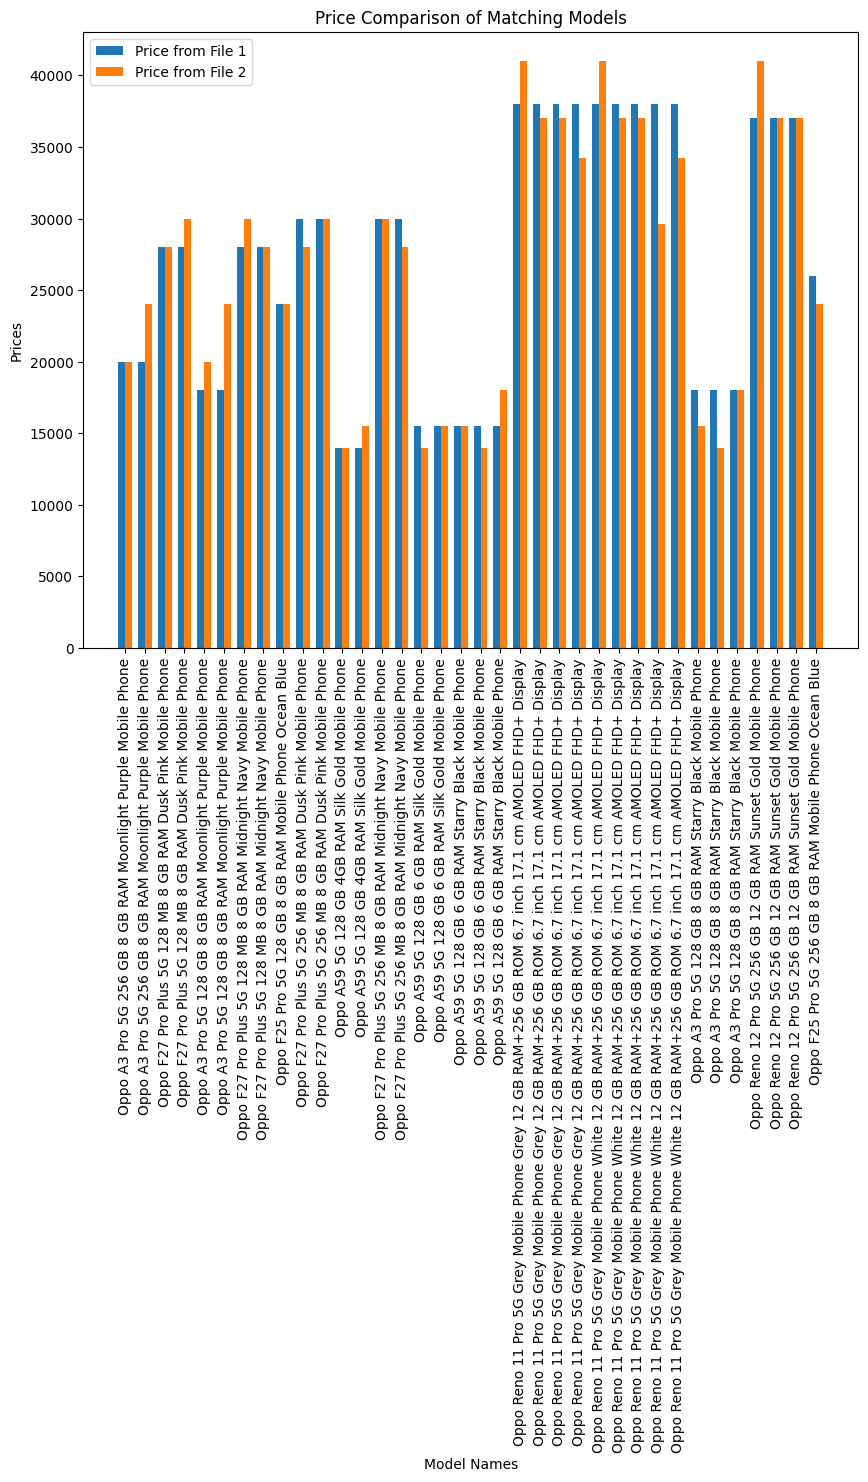

In [14]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import matplotlib.pyplot as plt
import numpy as np

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Function to preprocess model names
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return filtered_words

# Function to check if at least four words match
def at_least_four_words_match(words1, words2):
    count1 = Counter(words1)
    count2 = Counter(words2)
    common_words = count1 & count2
    return sum(common_words.values()) >= 4

# Function to compare and find matching names and their prices
def find_matching_names_and_compare_prices(file1, file2, output_file):
    # Read CSV files into DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    matched_data = []

    # Iterate through rows of both DataFrames
    for idx1, row1 in df1.iterrows():
        model_name1 = str(row1['Model Name'])  # Assuming 'Model Name' is the column name
        price1 = row1['Price']  # Assuming 'Price' is the column name
        preprocessed_model1 = preprocess(model_name1)
        
        for idx2, row2 in df2.iterrows():
            model_name2 = str(row2['Model Name'])  # Assuming 'Model Name' is the column name
            price2 = row2['Price']  # Assuming 'Price' is the column name
            preprocessed_model2 = preprocess(model_name2)
            
            if at_least_four_words_match(preprocessed_model1, preprocessed_model2):
                matched_data.append((model_name1, price1, model_name2, price2))

    # Create DataFrame from matched_data list
    df_output = pd.DataFrame(matched_data, columns=['Model Name from File 1', 'Price from File 1', 'Model Name from File 2', 'Price from File 2'])

    # Save to output file
    df_output.to_csv(output_file, index=False)

    return df_output

# Function to visualize price differences
def visualize_price_differences(df):
    # Create a bar plot to visualize price differences
    df['Price Difference'] = df['Price from File 1'] - df['Price from File 2']
    
    fig, ax = plt.subplots(figsize=(10, 8))
    index = np.arange(len(df))
    bar_width = 0.35

    bar1 = ax.bar(index, df['Price from File 1'], bar_width, label='Price from File 1')
    bar2 = ax.bar(index + bar_width, df['Price from File 2'], bar_width, label='Price from File 2')

    ax.set_xlabel('Model Names')
    ax.set_ylabel('Prices')
    ax.set_title('Price Comparison of Matching Models')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(df['Model Name from File 1'], rotation=90)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage
file1 = 'output11.csv'
file2 = 'output21.csv'
output_file = 'matched_models_with_prices.csv'
df_matched = find_matching_names_and_compare_prices(file1, file2, output_file)
visualize_price_differences(df_matched)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


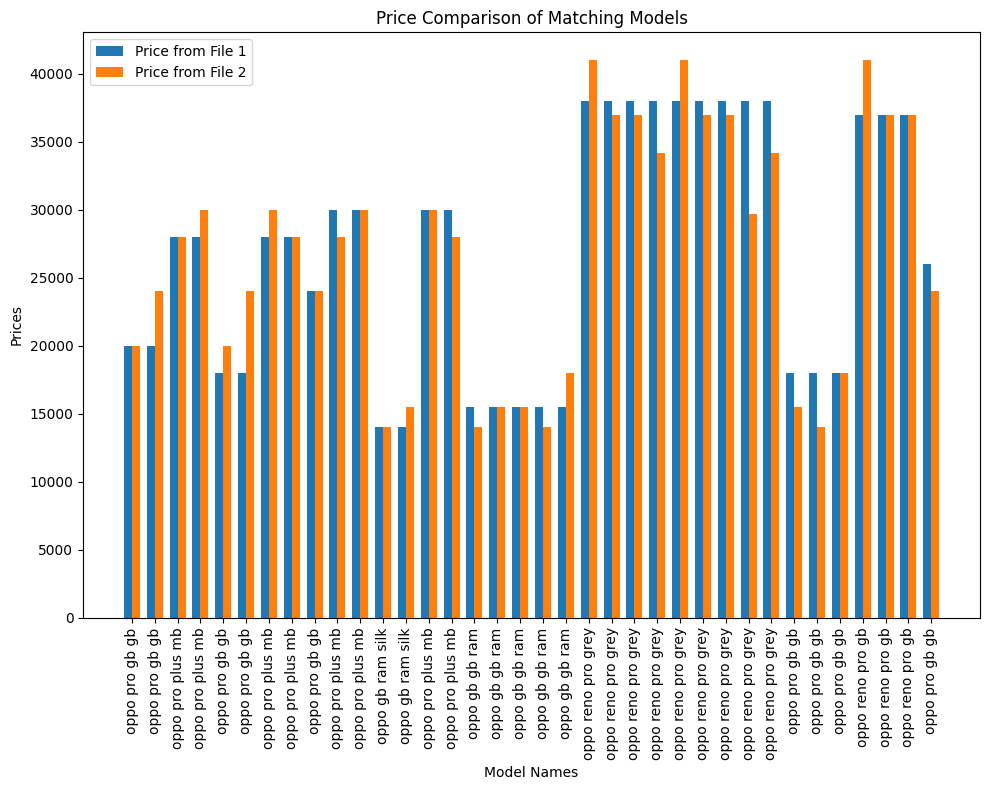

In [15]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import matplotlib.pyplot as plt
import numpy as np

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Function to preprocess model names
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return filtered_words

# Function to check if at least four words match
def at_least_four_words_match(words1, words2):
    count1 = Counter(words1)
    count2 = Counter(words2)
    common_words = count1 & count2
    return sum(common_words.values()) >= 4

# Function to compare and find matching names and their prices
def find_matching_names_and_compare_prices(file1, file2, output_file):
    # Read CSV files into DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    matched_data = []

    # Iterate through rows of both DataFrames
    for idx1, row1 in df1.iterrows():
        model_name1 = str(row1['Model Name'])  # Assuming 'Model Name' is the column name
        price1 = row1['Price']  # Assuming 'Price' is the column name
        preprocessed_model1 = preprocess(model_name1)
        
        for idx2, row2 in df2.iterrows():
            model_name2 = str(row2['Model Name'])  # Assuming 'Model Name' is the column name
            price2 = row2['Price']  # Assuming 'Price' is the column name
            preprocessed_model2 = preprocess(model_name2)
            
            if at_least_four_words_match(preprocessed_model1, preprocessed_model2):
                matched_data.append((model_name1, price1, model_name2, price2))

    # Create DataFrame from matched_data list
    df_output = pd.DataFrame(matched_data, columns=['Model Name from File 1', 'Price from File 1', 'Model Name from File 2', 'Price from File 2'])

    # Save to output file
    df_output.to_csv(output_file, index=False)

    return df_output

# Function to preprocess and get the first four words from model names
def get_first_four_words(model_name):
    words = preprocess(model_name)
    return ' '.join(words[:4])

# Function to visualize price differences
def visualize_price_differences(df):
    # Create a bar plot to visualize price differences
    df['Price Difference'] = df['Price from File 1'] - df['Price from File 2']
    
    fig, ax = plt.subplots(figsize=(10, 8))
    index = np.arange(len(df))
    bar_width = 0.35

    bar1 = ax.bar(index, df['Price from File 1'], bar_width, label='Price from File 1')
    bar2 = ax.bar(index + bar_width, df['Price from File 2'], bar_width, label='Price from File 2')

    ax.set_xlabel('Model Names')
    ax.set_ylabel('Prices')
    ax.set_title('Price Comparison of Matching Models')

    # Get the first four words for x-axis labels
    x_labels = df['Model Name from File 1'].apply(get_first_four_words)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(x_labels, rotation=90)
    
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage
file1 = 'output11.csv'
file2 = 'output21.csv'
output_file = 'matched_models_with_prices.csv'
df_matched = find_matching_names_and_compare_prices(file1, file2, output_file)
visualize_price_differences(df_matched)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


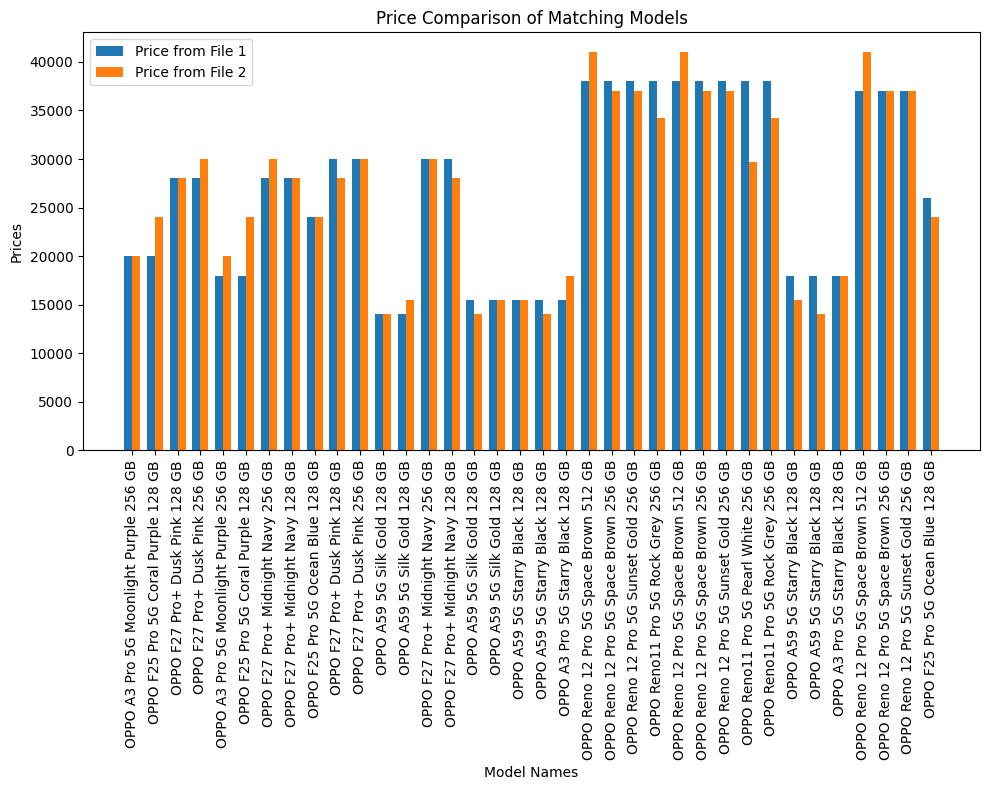

In [19]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import matplotlib.pyplot as plt
import numpy as np

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Function to preprocess model names
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return filtered_words

# Function to check if at least four words match
def at_least_four_words_match(words1, words2):
    count1 = Counter(words1)
    count2 = Counter(words2)
    common_words = count1 & count2
    return sum(common_words.values()) >= 4

# Function to compare and find matching names and their prices
def find_matching_names_and_compare_prices(file1, file2, output_file):
    # Read CSV files into DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    matched_data = []

    # Iterate through rows of both DataFrames
    for idx1, row1 in df1.iterrows():
        model_name1 = str(row1['Model Name'])  # Assuming 'Model Name' is the column name
        price1 = row1['Price']  # Assuming 'Price' is the column name
        preprocessed_model1 = preprocess(model_name1)
        
        for idx2, row2 in df2.iterrows():
            model_name2 = str(row2['Model Name'])  # Assuming 'Model Name' is the column name
            price2 = row2['Price']  # Assuming 'Price' is the column name
            preprocessed_model2 = preprocess(model_name2)
            
            if at_least_four_words_match(preprocessed_model1, preprocessed_model2):
                matched_data.append((model_name1, price1, model_name2, price2))

    # Create DataFrame from matched_data list
    df_output = pd.DataFrame(matched_data, columns=['Model Name from File 1', 'Price from File 1', 'Model Name from File 2', 'Price from File 2'])

    # Save to output file
    df_output.to_csv(output_file, index=False)

    return df_output

# Function to visualize price differences
def visualize_price_differences(df):
    # Create a bar plot to visualize price differences
    df['Price Difference'] = df['Price from File 1'] - df['Price from File 2']
    
    fig, ax = plt.subplots(figsize=(10, 8))
    index = np.arange(len(df))
    bar_width = 0.35

    bar1 = ax.bar(index, df['Price from File 1'], bar_width, label='Price from File 1')
    bar2 = ax.bar(index + bar_width, df['Price from File 2'], bar_width, label='Price from File 2')

    ax.set_xlabel('Model Names')
    ax.set_ylabel('Prices')
    ax.set_title('Price Comparison of Matching Models')

    # Use full model names from File 1 for x-axis labels
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(df['Model Name from File 2'], rotation=90)
    
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage
file1 = 'output11.csv'
file2 = 'output21.csv'
output_file = 'matched_models_with_prices.csv'
df_matched = find_matching_names_and_compare_prices(file1, file2, output_file)
visualize_price_differences(df_matched)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


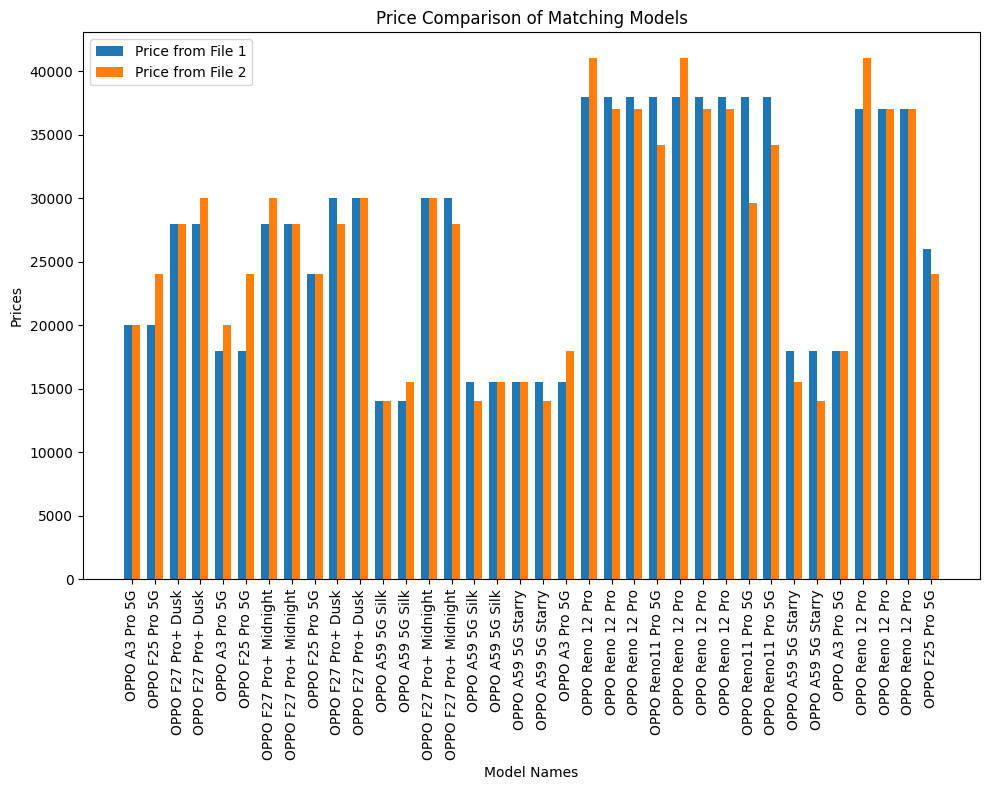

In [18]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import matplotlib.pyplot as plt
import numpy as np

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Function to preprocess model names
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return filtered_words

# Function to check if at least four words match
def at_least_four_words_match(words1, words2):
    count1 = Counter(words1)
    count2 = Counter(words2)
    common_words = count1 & count2
    return sum(common_words.values()) >= 4

# Function to compare and find matching names and their prices
def find_matching_names_and_compare_prices(file1, file2, output_file):
    # Read CSV files into DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    matched_data = []

    # Iterate through rows of both DataFrames
    for idx1, row1 in df1.iterrows():
        model_name1 = str(row1['Model Name'])  # Assuming 'Model Name' is the column name
        price1 = row1['Price']  # Assuming 'Price' is the column name
        preprocessed_model1 = preprocess(model_name1)
        
        for idx2, row2 in df2.iterrows():
            model_name2 = str(row2['Model Name'])  # Assuming 'Model Name' is the column name
            price2 = row2['Price']  # Assuming 'Price' is the column name
            preprocessed_model2 = preprocess(model_name2)
            
            if at_least_four_words_match(preprocessed_model1, preprocessed_model2):
                matched_data.append((model_name1, price1, model_name2, price2))

    # Create DataFrame from matched_data list
    df_output = pd.DataFrame(matched_data, columns=['Model Name from File 1', 'Price from File 1', 'Model Name from File 2', 'Price from File 2'])

    # Save to output file
    df_output.to_csv(output_file, index=False)

    return df_output

# Function to get the first four words from model names
def get_first_four_words(model_name):
    words = model_name.split()
    return ' '.join(words[:4])

# Function to visualize price differences
def visualize_price_differences(df):
    # Create a bar plot to visualize price differences
    df['Price Difference'] = df['Price from File 1'] - df['Price from File 2']
    
    fig, ax = plt.subplots(figsize=(10, 8))
    index = np.arange(len(df))
    bar_width = 0.35

    bar1 = ax.bar(index, df['Price from File 1'], bar_width, label='Price from File 1')
    bar2 = ax.bar(index + bar_width, df['Price from File 2'], bar_width, label='Price from File 2')

    ax.set_xlabel('Model Names')
    ax.set_ylabel('Prices')
    ax.set_title('Price Comparison of Matching Models')

    # Get the first four words for x-axis labels
    x_labels = df['Model Name from File 2'].apply(get_first_four_words)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(x_labels, rotation=90)
    
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage
file1 = 'output11.csv'
file2 = 'output21.csv'
output_file = 'matched_models_with_prices.csv'
df_matched = find_matching_names_and_compare_prices(file1, file2, output_file)
visualize_price_differences(df_matched)
